   StudyHours  PrevExamScore  Pass
0           1             30     0
1           2             40     0
2           3             45     0
3           4             50     0
4           5             60     0
Training data: (8, 2), (8,)
Testing data: (2, 2), (2,)
Tree depth: 1
Number of leaves: 2
Predicted Outcomes (Pass/Fail): [1 0]
Actual Outcomes: [1 0]
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



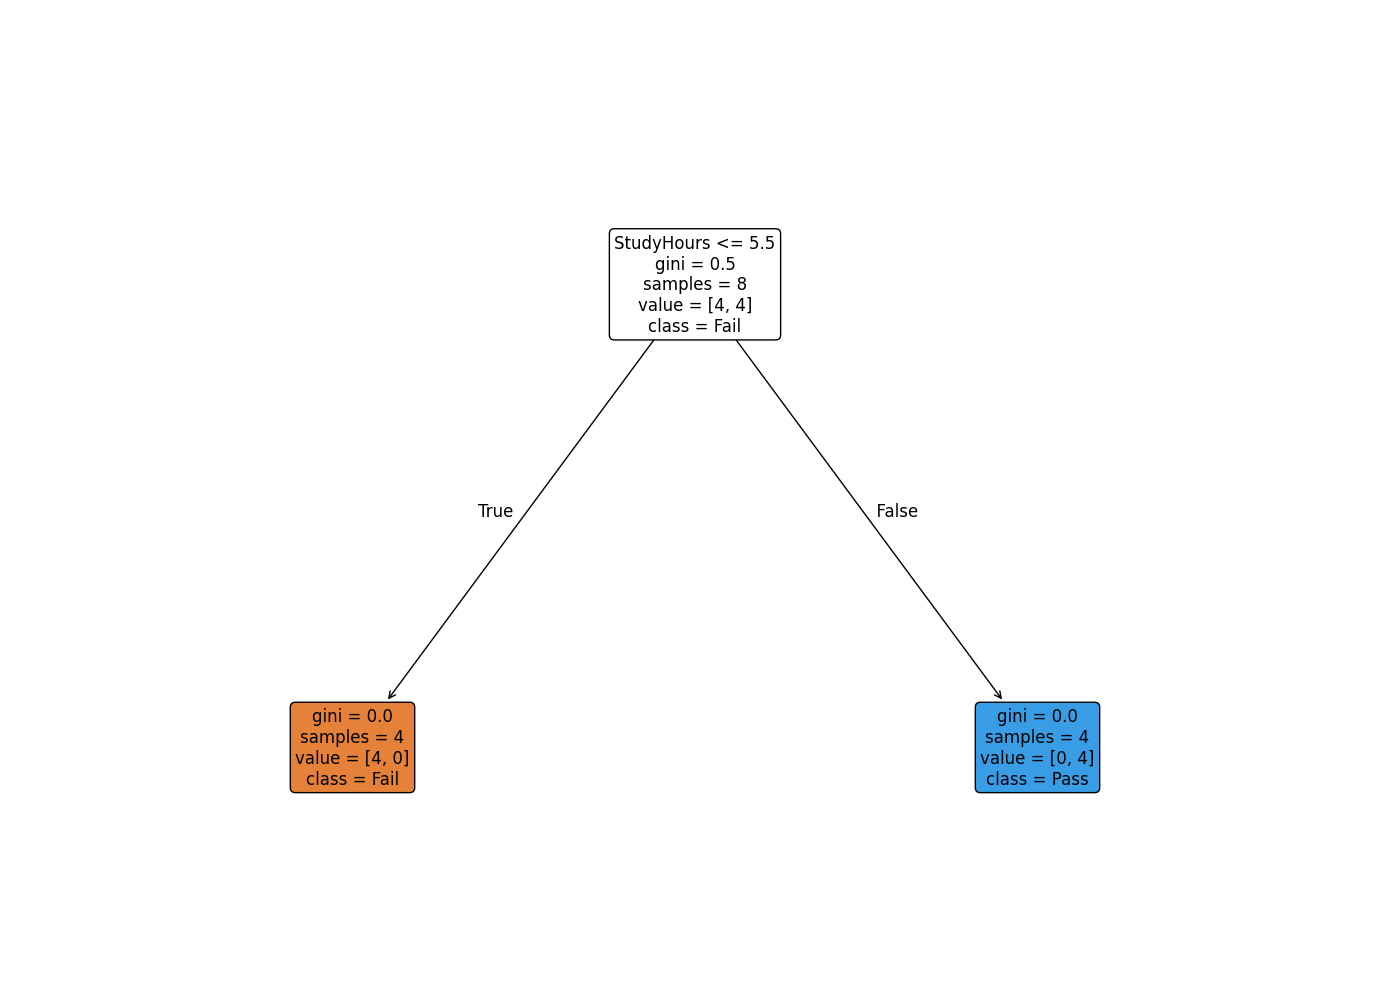

Accuracy (Tuned Model): 1.0


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PrevExamScore': [30, 40, 45, 50, 60, 65, 70, 75, 80, 85],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head())

# Features (X) and Target (y)
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']                           # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model's parameters
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Outcomes (Pass/Fail):", y_pred)
print("Actual Outcomes:", y_test.values)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# plt.style.use('dark_background')

# Visualize the decision tree with better formatting
plt.figure(figsize=(14, 10))
tree.plot_tree(
    model,
    feature_names=['StudyHours', 'PrevExamScore'],
    class_names=['Fail', 'Pass'],
    filled=True,
    rounded=True,
    fontsize=12,
    proportion=False,
    precision=2
)
plt.title('Decision Tree for Classifying Pass/Fail', fontsize=16, color='white', pad=20)
plt.tight_layout()
plt.show()


# Limit the tree depth to avoid overfitting
model_tuned = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model on the training data
model_tuned.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = model_tuned.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy (Tuned Model): {accuracy_tuned}")